# Import Libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib.patches as patches
import matplotlib.ticker as ticker
import re
from collections import defaultdict
import os

# List cations and anions, as well as their atomic properties



In [2]:
el1=['Li','Na','K','Cu','Rb','Ag','Cs','Tl','Au','Fr']  #List of 1+ cations
t1=[454,372,337,1356,312,1234,302,2300,1336,293]        #Melting temperature 
r1=[1.61,2.65,3.69,2.04,4.1,2.375,4.31,2.235,2.66,4.37] #Zunger pseudopotential radii 
v1= [1,1,1,11,1,11,1,3,11,1]                            #Valence electron count
x1= [0.9,0.89,0.80,1.08,0.8,1.07,0.77,1.69,1.19,0.70]   #electronegativity

el3=['Al','Sc','Ti','V','Cr','Mn','Fe','Co','Ni','Ga',
'Y','Zr','Nb','Mo','Tc','Ru','Rh','Pd','In','Sb',
'La','Ce','Pr','Nd','Pm','Sm','Eu','Gd','Tb','Dy',
'Ho','Er','Tm','Yb','Lu','Hf','Ta','W','Re','Os',
'Ir','Pt','Tl','Bi','Au','B']                               #list of 3+ cations 

t3=[832,1811,1938,2190,2176,1517,1812,1768,1728,303,
1773,2128,2770,2890,2473,2700,2239,1823,1773,903,
1193,1077,1208,1297,1300,1345,1100,1585,1629,1680,
1734,1770,1818,1087,1928,2250,3270,3650,3308,3500,
2727,2043,2300,545,1336,2300]                                

r3=[1.675,2.75,2.58,2.43,2.44,2.22,2.11,2.02,2.18,1.695,
2.94,2.825,2.76,2.72,2.65,2.605,2.52,2.45,2.05,1.765,
3.08,4.50,4.48,3.99,3.99,4.14,3.94,3.91,3.89,3.67,
3.65,3.63,3.60,3.59,3.37,2.91,2.79,2.735,2.68,2.65,
2.628,2.70,2.235,1.997,2.66,0.785]                           

v3=[3,3,4,5,6,7,8,9,10,3,
3,4,5,6,7,8,9,10,3,5,
3,3,3,3,3,3,3,3,3,3,
3,3,3,3,3,4,5,6,7,8,
9,10,3,5,11,3]                                         

x3=[1.64,1.5,1.86,2.22,2.00,2.04,1.67,1.72,1.76,1.70,
1.41,1.70,2.03,1.94,2.18,1.97,1.99,2.08,1.63,2.14,
1.35,1.1,1.1,1.2,1.15,1.2,1.15,1.1,1.2,1.15,
1.2,1.2,1.2,1.1,1.2,1.73,1.94,1.79,2.06,1.85,
1.87,1.91,1.69,2.14,1.19,1.9]

el4=['P']                    # List of 4+ cations
t4=[870]                              
r4=[1.24]#                           
v4=[5]
x4=[2.32]

el2=['S','Se']             # List of 2- anion
t2=[392,490]               
r2=[1.10,1.285]            
v2=[6,6]                  
x2=[2.65,2.54]            

# Generate all potential quaternary compositions and calculate their properties based on atomic parameters

In [3]:
compound_forming = open('Compound Forming.txt','w') #This is for collecting all generated Quaternary compositions
cf_2decimal = open('cf_2decimal.txt','w')        #The same content, but with only 2 decimals for data extraction

m=0
for i in range (0,len(el1)):      #iteration through all possible combinations of el1,el2,el3,and el4
    for j in range (0,len(el3)):
        for k in range (0,len(el4)):
            for l in range (0,len(el2)):
                m=m+1
                name = el1[i]+el3[j]+el4[k]+"2"+el2[l]+"6"+' ' ### Displays the name of the interated compund
                #print(name)     
                num = [t1[i],t3[j],t4[k],t2[l]]
                sorted_numbers = sorted(num, reverse=True)
                nmax,n2nd,n3rd,n4th=sorted_numbers
                
                delta_t = (float(nmax/n2nd)+float(nmax/n3rd)+float(nmax/n4th)+float(n2nd/n3rd)+
                float(n2nd/n4th)+float(n3rd/n4th))/6
                #print(f"{delta_t:.2f}")
            
                Absdelta_r = (
                    abs(r1[i]-r3[j])+abs(r1[i]-r4[k])+abs(r1[i]-r2[l])+
                    abs(r3[j]-r4[k])+abs(r3[j]-r2[l])+
                    abs(r4[k]-r2[l]))/6  #Calculates <abs(ΔR)>
                #print(f"{Absdelta_r:.2f}")

                Absdelta_Nv = (
                    abs(v1[i]-v3[j])+abs(v1[i]-v4[k])+abs(v1[i]-v2[l])+
                    abs(v3[j]-v4[k])+abs(v3[j]-v2[l])+
                    abs(v4[k]-v2[l]))/6  #Calculates <abs(ΔNv)>
                #print(f"{Absdelta_Nv:.2f}")

                Absdelta_Neg = (
                    abs(x1[i]-x3[j])+abs(x1[i]-x4[k])+abs(x1[i]-x2[l])+
                    abs(x3[j]-x4[k])+abs(x3[j]-x2[l])+
                    abs(x4[k]-x2[l]))/6  #Calculates <abs(ΔX)>
                #print(f"{Absdelta_Neg:.2f}")
                
                outlist=str(m)+' '+name+str(delta_t)+' '+str(Absdelta_r)+' '+str(Absdelta_Nv)+ ' '+str(Absdelta_Neg)+' '+str(r1[i])+' '+ str(r3[j])+ '\n'  ### creates a list of values with variables "name",
                compound_forming.write(outlist) #writes outlist into the file we created in the beginning 

                outlist_2d=f"{m} {name} {delta_t:.2f} {Absdelta_r:.2f} {Absdelta_Nv:.2f} {Absdelta_Neg:.2f} {r1[i]} {r3[j]}\n"
                cf_2decimal.write(outlist_2d) #writes outlist into the file we created in the beginning
                
                
compound_forming.close() # closes text file
cf_2decimal.close()

# List all ICSD entries that fulfill our search standard

In [4]:
structure_list = [
    ("AgVP2Se6", ["AgVP2Se6", "CuVP2S6", "CuCrP2Se6"]),  #3
    ("AgVP2S6", ["AgVP2S6", "AgCrP2S6"]),  #2
    ("AgInP2S6", ["AgInP2S6", "AgScP2S6", "CuInP2Se6", "AgInP2Se6", "AgGaP2Se6", 
                 "AgErP2Se6", "AgScP2Se6", "AgTmP2Se6", "LiScP2S6", "CuBiP2Se6"]),  #10
    ("FePS3", ["AgCrP2Se6", "AgAlP2Se6"]),  # 2
    ("FePSe3", ["CuAlP2Se6"]),  # 1
    ("LiAlP2S6", ['LiAlP2S6']),  # 1
    ("NaYbP2S6", ["NaYbP2S6", "AgBiP2S6", "NaErP2S6", "NaLuP2S6", "NaTbP2S6", "NaYP2S6", "TlInP2Se6"]),  #7
    ("KBiP2Se6", ["KBiP2Se6", "NaSmP2S6", "NaCeP2S6", "NaSbP2S6", "NaPrP2S6", 
                 "KCeP2S6", "KPrP2S6", "TlCeP2S6", "RbLaP2S6", "NaLaP2S6", 
                 "NaCeP2Se6", "KLaP2Se6", "TlCeP2Se6", "TlLaP2Se6", "TlLaP2S6", 
                 "TlPrP2Se6", "TlBiP2Se6", "KBiP2S6"]),  #18
    ("KSbP2Se6", ["KSbP2S6","KSbP2Se6","KBiP2S6","TlBiP2S6",
                  "TlInP2S6","TlSbP2S6","TlSbP2Se6","TlDyP2Se6",
                  "TlErP2Se6","TlSmP2Se6","TlYP2Se6","TlTbP2Se6"]),  #12
    ("CsCeP2S6", ["CsCeP2S6", "CsCeP2Se6", "CsLaP2S6"]),  # 3
    ("unclassified", ["CuInP2S6", "CuCrP2S6", "CuScP2S6", "AgBiP2Se6"]),  #4
]

# Extract calculated properties and their associated compound names into separated files

In [5]:
# Open the output files for writing
with open('reported_ICSD.txt', 'w') as my_file, \
     open('unreported_ICSD.txt', 'w') as my_file1, \
     open('unclassified_ICSD.txt', 'w') as my_file2:

    # Read the compound data from the file and split by spaces
    with open('Compound Forming.txt', "r") as myfile:
        data = [line.strip() for line in myfile]
    
    # Split each line into words and store the result in data1
    data1 = [line.split() for line in data]

    #avoid writing duplicate entries
    written_entries = set()

    #Include all compounds from structure_list
    all_compounds_in_structure = []
    for compound_type, compounds in structure_list:
        all_compounds_in_structure.extend(compounds)

    # Process the compounds from structure_list
    for compound_type, compounds in structure_list:
        # Get the index of compound_type in the structure_list
        compound_type_index = next(i for i, (type_name, _) in enumerate(structure_list) if type_name == compound_type)

        # Iterate over compounds in structure_list
        for compound in compounds:
            for k in range(len(data1)):
                # Create the entry with the index number between compound data and compound_type
                entry = (f"{data1[k][1]} {data1[k][2]} {data1[k][3]} {data1[k][4]} {data1[k][5]} "
                         f"{compound_type_index} {compound_type} {data1[k][6]} {data1[k][7]}")

                # If the compound matches the corresponding compound in data1
                if compound == data1[k][1]:
                    # If the compound is not in "unclassified", write it to my_file
                    if compound_type != "unclassified" and entry not in written_entries:
                        my_file.write(entry + '\n')
                        written_entries.add(entry) #Include all ICSD entries escept the compounds with unclassified structure types

    # write the remaining entries to my_file1 that are NOT in structure_list
    for k in range(len(data1)):
        S = data1[k][1]
        # Write the line to my_file1 if the compound is NOT in structure_list
        if S not in all_compounds_in_structure:
            line1 = (f"{data1[k][1]} {data1[k][2]} {data1[k][3]} {data1[k][4]} {data1[k][5]} "
                     f"{data1[k][6]} {data1[k][7]}")
            if line1 not in written_entries:
                my_file1.write(line1 + '\n')
                written_entries.add(line1)

    # Process unclassified compounds and write them to my_file2
    # Collect all unclassified compounds from structure_list
    unclassified_compounds = set(
        compound for compound_type, compounds in structure_list if compound_type == "unclassified" for compound in compounds
    )

    # Filter and write all unclassified compounds from data1 to my_file2
    for k in range(len(data1)):
        S = data1[k][1]
        # Check if the compound is unclassified
        if S in unclassified_compounds:
            unclassified_entry = (f"{data1[k][1]} {data1[k][2]} {data1[k][3]} {data1[k][4]} {data1[k][5]} "
                                  f"{data1[k][6]} {data1[k][7]}")
            if unclassified_entry not in written_entries:
                my_file2.write(unclassified_entry + '\n')
                written_entries.add(unclassified_entry)


# Quantum Structure Diagram (Radii vs Melting temperature)

/tmp/ipykernel_115/2220035772.py:34: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  half_1 = patches.Wedge((x, y), 0.03, 90, 270, color='deepskyblue', edgecolor='black')
/tmp/ipykernel_115/2220035772.py:35: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  half_2 = patches.Wedge((x, y), 0.03, 270, 90, color='magenta', edgecolor='black')
/tmp/ipykernel_115/2220035772.py:46: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  half_1 = patches.Wedge((x, y), 0.03, 90, 270, color='lime', edgecolor='black')
/tmp/ipykernel_115/2220035772.py:47: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  half_2 = patches.Wedge((x, y), 0.03, 270, 90, color='red', edgecolor='black')
/tmp/ipykernel_115/2220035772.py:40: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  half_

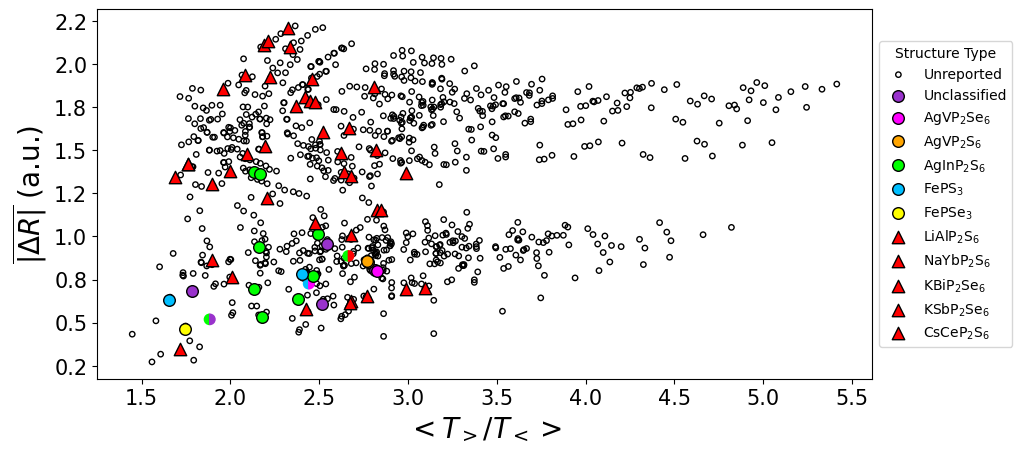

In [6]:
S_types = ("AgVP2Se6","AgVP2S6","AgInP2S6","FePS3","FePSe3","LiAlP2S6","NaYbP2S6","KBiP2Se6","KSbP2Se6","CsCeP2S6")
def to_subscript(s):
    return re.sub(r'(\d)', r'$_{\1}$', s)

S_types_with_subscripts = [to_subscript(name) for name in S_types]

inlist = np.loadtxt('reported_ICSD.txt',dtype = float, usecols=(1,2,3,4,5),delimiter=' ') 
inlist_char = np.loadtxt('reported_ICSD.txt',dtype = str, usecols=(0),delimiter=' ')  #column-0: compound name
inlist_val = np.loadtxt('reported_ICSD.txt',dtype = int, usecols=(5),delimiter=' ')  #column-5: the number corresponds to the structure type, this is define color coating
not_Classified = np.loadtxt('unclassified_ICSD.txt',dtype = float, usecols=(1,2,3,4),delimiter=' ')
not_inlist = np.loadtxt('unreported_ICSD.txt',dtype = float, usecols=(1,2,3,4),delimiter= ' ')

fig = plt.plot()
ax = plt.subplot()
ax.scatter((not_inlist[:,0]),(not_inlist[:,1]), edgecolor = 'black', s = 15, label = "Unreported",marker = 'o',facecolors='none') #ax.scatter:create a scatter plot
ax.scatter((not_Classified[:,0]),(not_Classified[:,1]), c = 'darkorchid',edgecolor = 'black', s = 70, label = "Unclassified", marker = 'o',)

inlist = np.array(inlist)
color_map = {
    0: ('magenta', 'o',70,1),   #AgVP2Se6
    1: ('orange', 'o',70,1),       #AgVP2S6
    2: ('lime', 'o',70,1),         #AgInP2S6
    3: ('deepskyblue', 'o',70,1), #FePS3
    4: ('yellow', 'o',70,1),}      #FePSe3

inlist_val = inlist[:, 4].astype(int)
excluded_indices = [2,13,14]  #2,13,14 represent the line in inlist: 'CuCrP2Se6','LiScP2S6','CuBiP2Se6'

for i in range(len(inlist)): #plot the structure from ICSD 
    x=inlist[i, 0]
    y=inlist[i, 1]  
    S = str(inlist_char[i])       
    if S == 'CuCrP2Se6':   #It has 2 diff structure type, so color coated with two colors.  
        half_1 = patches.Wedge((x, y), 0.03, 90, 270, color='deepskyblue', edgecolor='black')
        half_2 = patches.Wedge((x, y), 0.03, 270, 90, color='magenta', edgecolor='black')
        ax.add_patch(half_1)
        ax.add_patch(half_2)
        
    if S == 'CuBiP2Se6':   #It has 2 diff structure type, so color coated with two colors.  
        half_1 = patches.Wedge((x, y), 0.03, 90, 270, color='lime', edgecolor='black')
        half_2 = patches.Wedge((x, y), 0.03, 270, 90, color='darkorchid', edgecolor='black')
        ax.add_patch(half_1)
        ax.add_patch(half_2) 
       
    if S == 'LiScP2S6':   #It has 2 diff structure type, so color coated with two colors.  
        half_1 = patches.Wedge((x, y), 0.03, 90, 270, color='lime', edgecolor='black')
        half_2 = patches.Wedge((x, y), 0.03, 270, 90, color='red', edgecolor='black')
        ax.add_patch(half_1)
        ax.add_patch(half_2)
    if i in excluded_indices:
        continue  # Skip these indices
    
    label = inlist_val[i]       # Extract label as integer
    color_marker_tuple = color_map.get(label, ('red', '^',80,1.0))  # Default to red triangle
    color, marker, size, alpha = color_marker_tuple  # Unpack the tuple
    label_with_subscript = S_types_with_subscripts[inlist_val[i]]
    ax.scatter(x,y, c=color, s=size, edgecolors='black', marker=marker, label=label_with_subscript, alpha=alpha)
        

def legend_without_duplicate_labels(figure):  # defines a function named "legend_without_duplicate_labels(figure)" how labels are input in to the legend and removes duplicate legend labels
    handles, labels = ax.get_legend_handles_labels()  # retirieves label values and stores as handles
    by_label = dict(zip(labels, handles))  #organizes dictionary with zip by order in which the label is first passed and stores new dictionary as by_label. sets labels as the key and handles as the values
    
    lgd = ax.legend(by_label.values(), by_label.keys(), loc='center left', bbox_to_anchor=(1, 0.5),title = "Structure Type")  #sets lgd as the list in the dic with no duplicate keys. loc and bbox will define the location of the legend box. 


legend_without_duplicate_labels(ax)

#Title and labels
#plt.title(r'$A^{1+}A^{\prime^ 3+}$' + "Compound Forming Map", fontsize = 20)   
plt.xlabel(r'$<T_{>}/T_{<}>$',fontsize = 20)
#plt.ylabel("ΔR mean (a.u.)", fontsize = 20)
plt.ylabel(r"$\overline{|ΔR|}$ (a.u.)", fontsize=20)

#x and y tick labels
ax.set_xticklabels(ax.get_xticks(),fontsize = 15)
ax.set_yticklabels(ax.get_yticks(),fontsize = 15)

ax.xaxis.set_major_formatter(ticker.FormatStrFormatter('%.1f'))
ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%.1f'))

#Save and show figure
ax.figure.set_figwidth(10)     
plt.savefig("Plot-1+3+-T&R ", dpi= 600, format=None, metadata=None,
        bbox_inches='tight', pad_inches=.4,
        facecolor='auto', edgecolor='auto',
        backend=None,)

plt.show()


# Quantum Structure Diagram (Melting temperature vs Valence electron)

/tmp/ipykernel_115/3067230588.py:34: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  half_1 = patches.Wedge((x, y), 0.05, 0, 180, color='deepskyblue', edgecolor='black')
/tmp/ipykernel_115/3067230588.py:35: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  half_2 = patches.Wedge((x, y), 0.05, 180, 360, color='magenta', edgecolor='black')
/tmp/ipykernel_115/3067230588.py:46: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  half_1 = patches.Wedge((x, y), 0.05, 0, 180, color='lime', edgecolor='black')
/tmp/ipykernel_115/3067230588.py:47: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  half_2 = patches.Wedge((x, y), 0.05, 180, 360, color='red', edgecolor='black')
/tmp/ipykernel_115/3067230588.py:40: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  half_

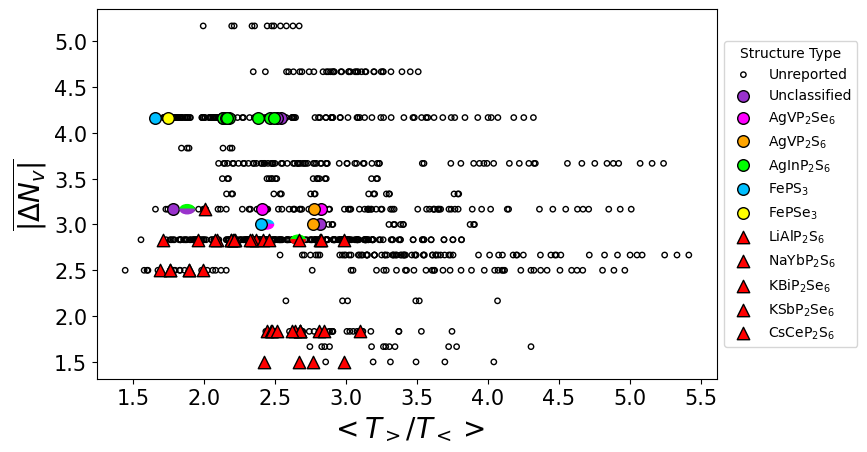

In [7]:
S_types = ("AgVP2Se6","AgVP2S6","AgInP2S6","FePS3","FePSe3","LiAlP2S6","NaYbP2S6","KBiP2Se6","KSbP2Se6","CsCeP2S6")
def to_subscript(s):
    return re.sub(r'(\d)', r'$_{\1}$', s)

S_types_with_subscripts = [to_subscript(name) for name in S_types]

inlist = np.loadtxt('reported_ICSD.txt',dtype = float, usecols=(1,2,3,4,5),delimiter=' ') 
inlist_char = np.loadtxt('reported_ICSD.txt',dtype = str, usecols=(0),delimiter=' ')  #column-0: compound name
inlist_val = np.loadtxt('reported_ICSD.txt',dtype = int, usecols=(5),delimiter=' ')  #column-5: the number corresponds to the structure type, this is define color coating
not_Classified = np.loadtxt('unclassified_ICSD.txt',dtype = float, usecols=(1,2,3,4),delimiter=' ')
not_inlist = np.loadtxt('unreported_ICSD.txt',dtype = float, usecols=(1,2,3,4),delimiter= ' ')

fig = plt.plot()
ax = plt.subplot()
ax.scatter((not_inlist[:,0]),(not_inlist[:,2]), edgecolor = 'black', s = 15, label = "Unreported",marker = 'o',facecolors='none') #ax.scatter:create a scatter plot
ax.scatter((not_Classified[:,0]),(not_Classified[:,2]), c = 'darkorchid',edgecolor = 'black', s = 70, label = "Unclassified", marker = 'o',)

inlist = np.array(inlist)
color_map = {
    0: ('magenta', 'o',70,1),   #AgVP2Se6
    1: ('orange', 'o',70,1),       #AgVP2S6
    2: ('lime', 'o',70,1),         #AgInP2S6
    3: ('deepskyblue', 'o',70,1), #FePS3
    4: ('yellow', 'o',70,1),}     #FePSe3

inlist_val = inlist[:, 4].astype(int)
excluded_indices = [2,13,14]  #2,13,14 represent the line in inlist: 'CuCrP2Se6','LiScP2S6','CuBiP2Se6'

for i in range(len(inlist)):#plot the structure from ICSD 
    x=inlist[i, 0]
    y=inlist[i, 2]
    S = str(inlist_char[i])       
    if S == 'CuCrP2Se6':   #It has 2 diff structure type, so color coated with two colors.  
        half_1 = patches.Wedge((x, y), 0.05, 0, 180, color='deepskyblue', edgecolor='black')
        half_2 = patches.Wedge((x, y), 0.05, 180, 360, color='magenta', edgecolor='black')
        ax.add_patch(half_1)
        ax.add_patch(half_2)
        
    if S == 'CuBiP2Se6':   #It has 2 diff structure type, so color coated with two colors.  
        half_1 = patches.Wedge((x, y), 0.05, 0, 180, color='lime', edgecolor='black')
        half_2 = patches.Wedge((x, y), 0.05, 180, 360, color='darkorchid', edgecolor='black')
        ax.add_patch(half_1)
        ax.add_patch(half_2) 
       
    if S == 'LiScP2S6':   #It has 2 diff structure type, so color coated with two colors.  
        half_1 = patches.Wedge((x, y), 0.05, 0, 180, color='lime', edgecolor='black')
        half_2 = patches.Wedge((x, y), 0.05, 180, 360, color='red', edgecolor='black')
        ax.add_patch(half_1)
        ax.add_patch(half_2)
    if i in excluded_indices:
        continue  # Skip these indices
        
    label = inlist_val[i]                                    # Extract label as integer
    color_marker_tuple = color_map.get(label, ('red', '^',80,1.0))  # Default to red triangle
    color, marker, size, alpha = color_marker_tuple  # Unpack the tuple
    label_with_subscript = S_types_with_subscripts[inlist_val[i]]
    ax.scatter(x,y, c=color, s=size, edgecolors='black', marker=marker, label=label_with_subscript, alpha=alpha)


def legend_without_duplicate_labels(figure):  # defines a function named "legend_without_duplicate_labels(figure)" how labels are input in to the legend and removes duplicate legend labels
    handles, labels = ax.get_legend_handles_labels()  # retirieves label values and stores as handles
    by_label = dict(zip(labels, handles))  #organizes dictionary with zip by order in which the label is first passed and stores new dictionary as by_label. sets labels as the key and handles as the values
    
    lgd = ax.legend(by_label.values(), by_label.keys(), loc='center left', bbox_to_anchor=(1, 0.5),title = "Structure Type")  #sets lgd as the list in the dic with no duplicate keys. loc and bbox will define the location of the legend box. 


legend_without_duplicate_labels(ax)
 
plt.xlabel(r'$<T_{>}/T_{<}>$',fontsize = 20)
plt.ylabel(r"$\overline{|\Delta N_{v}|}$", fontsize=20)

ax.set_xticklabels(ax.get_xticks(),fontsize = 15)
ax.set_yticklabels(ax.get_yticks(),fontsize = 15)
ax.xaxis.set_major_formatter(ticker.FormatStrFormatter('%.1f'))
ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%.1f'))

#Save and show figure
ax.figure.set_figwidth(8)     
plt.savefig("Plot-1+3+-T&Nv ", dpi= 600, format=None, metadata=None,
        bbox_inches='tight', pad_inches=.4,
        facecolor='auto', edgecolor='auto',
        backend=None,)

plt.show()


# Quantum Structure Diagram (Radii vs Valence electron)

/tmp/ipykernel_115/2623426426.py:35: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  half_1 = patches.Wedge((x, y), 0.03, 90, 270, color='deepskyblue', edgecolor='black')
/tmp/ipykernel_115/2623426426.py:36: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  half_2 = patches.Wedge((x, y), 0.03, 270, 90, color='magenta', edgecolor='black')
/tmp/ipykernel_115/2623426426.py:47: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  half_1 = patches.Wedge((x, y), 0.03, 90, 270, color='lime', edgecolor='black')
/tmp/ipykernel_115/2623426426.py:48: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  half_2 = patches.Wedge((x, y), 0.03, 270, 90, color='red', edgecolor='black')
/tmp/ipykernel_115/2623426426.py:41: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  half_

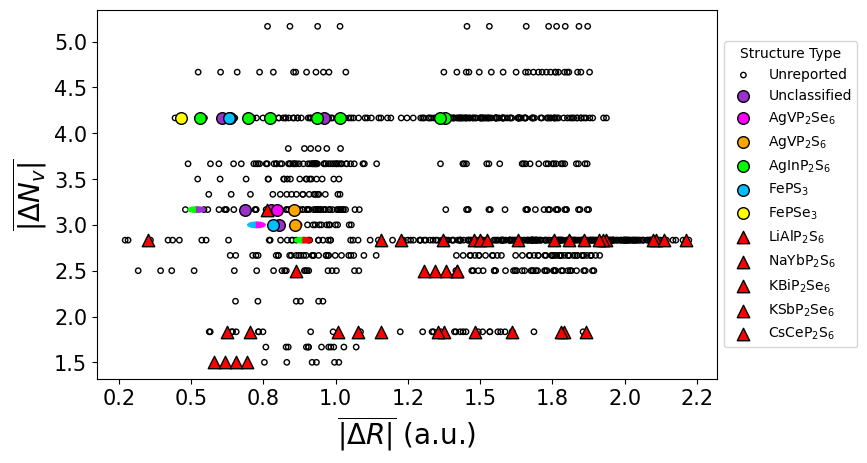

In [8]:
S_types = ("AgVP2Se6","AgVP2S6","AgInP2S6","FePS3","FePSe3","LiAlP2S6","NaYbP2S6","KBiP2Se6","KSbP2Se6","CsCeP2S6")
def to_subscript(s):
    return re.sub(r'(\d)', r'$_{\1}$', s)

S_types_with_subscripts = [to_subscript(name) for name in S_types]

inlist = np.loadtxt('reported_ICSD.txt',dtype = float, usecols=(1,2,3,4,5),delimiter=' ') 
inlist_char = np.loadtxt('reported_ICSD.txt',dtype = str, usecols=(0),delimiter=' ')  #column-0: compound name
inlist_val = np.loadtxt('reported_ICSD.txt',dtype = int, usecols=(5),delimiter=' ')  #column-5: the number corresponds to the structure type, this is define color coating
not_Classified = np.loadtxt('unclassified_ICSD.txt',dtype = float, usecols=(1,2,3,4),delimiter=' ')
not_inlist = np.loadtxt('unreported_ICSD.txt',dtype = float, usecols=(1,2,3,4),delimiter= ' ')

fig = plt.plot()
ax = plt.subplot()
ax.scatter((not_inlist[:,1]),(not_inlist[:,2]), edgecolor = 'black', s = 15, label = "Unreported",marker = 'o',facecolors='none') #ax.scatter:create a scatter plot
ax.scatter((not_Classified[:,1]),(not_Classified[:,2]), c = 'darkorchid',edgecolor = 'black', s = 70, label = "Unclassified", marker = 'o',)

inlist = np.array(inlist)
color_map = {
    0: ('magenta', 'o',70,1),   #AgVP2Se6
    1: ('orange', 'o',70,1),       #AgVP2S6
    2: ('lime', 'o',70,1),         #AgInP2S6
    3: ('deepskyblue', 'o',70,1), #FePS3
    4: ('yellow', 'o',70,1),}     #FePSe3


inlist_val = inlist[:, 4].astype(int)
excluded_indices = [2,13,14]  #2,13,14 represent the line in inlist: 'CuCrP2Se6','LiScP2S6','CuBiP2Se6'

for i in range(len(inlist)):#plot the structure from ICSD 
    x=inlist[i, 1]
    y=inlist[i, 2]
    S = str(inlist_char[i])       
    if S == 'CuCrP2Se6':   #It has 2 diff structure type, so color coated with two colors.  
        half_1 = patches.Wedge((x, y), 0.03, 90, 270, color='deepskyblue', edgecolor='black')
        half_2 = patches.Wedge((x, y), 0.03, 270, 90, color='magenta', edgecolor='black')
        ax.add_patch(half_1)
        ax.add_patch(half_2)
        
    if S == 'CuBiP2Se6':   #It has 2 diff structure type, so color coated with two colors.  
        half_1 = patches.Wedge((x, y), 0.03, 90, 270, color='lime', edgecolor='black')
        half_2 = patches.Wedge((x, y), 0.03, 270, 90, color='darkorchid', edgecolor='black')
        ax.add_patch(half_1)
        ax.add_patch(half_2) 
       
    if S == 'LiScP2S6':   #It has 2 diff structure type, so color coated with two colors.  
        half_1 = patches.Wedge((x, y), 0.03, 90, 270, color='lime', edgecolor='black')
        half_2 = patches.Wedge((x, y), 0.03, 270, 90, color='red', edgecolor='black')
        ax.add_patch(half_1)
        ax.add_patch(half_2)
    
    if i in excluded_indices:
        continue  # Skip these indices
        
    label = inlist_val[i]                                    # Extract label as integer
    color_marker_tuple = color_map.get(label, ('red', '^',80,1.0))  # Default to red triangle
    color, marker, size, alpha = color_marker_tuple  # Unpack the tuple
    label_with_subscript = S_types_with_subscripts[inlist_val[i]]
    ax.scatter(x,y, c=color, s=size, edgecolors='black', marker=marker, label=label_with_subscript, alpha=alpha)

def legend_without_duplicate_labels(figure):  # defines a function named "legend_without_duplicate_labels(figure)" how labels are input in to the legend and removes duplicate legend labels
    handles, labels = ax.get_legend_handles_labels()  # retirieves label values and stores as handles
    by_label = dict(zip(labels, handles))  #organizes dictionary with zip by order in which the label is first passed and stores new dictionary as by_label. sets labels as the key and handles as the values
    
    lgd = ax.legend(by_label.values(), by_label.keys(), loc='center left', bbox_to_anchor=(1, 0.5),title = "Structure Type")  #sets lgd as the list in the dic with no duplicate keys. loc and bbox will define the location of the legend box. 


legend_without_duplicate_labels(ax)
 
plt.xlabel(r"$\overline{|ΔR|}$ (a.u.)", fontsize=20)
plt.ylabel(r"$\overline{|\Delta N_{v}|}$", fontsize=20)

#x and y tick labels
ax.set_xticklabels(ax.get_xticks(),fontsize = 15)
ax.set_yticklabels(ax.get_yticks(),fontsize = 15)
ax.xaxis.set_major_formatter(ticker.FormatStrFormatter('%.1f'))
ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%.1f'))

#Save and show figure
ax.figure.set_figwidth(8)     
plt.savefig("Plot-1+3+-R&Nv", dpi= 600, format=None, metadata=None,
        bbox_inches='tight', pad_inches=.4,
        facecolor='auto', edgecolor='auto',
        backend=None,)

plt.show()


# Quantum Structure Diagram (Radii vs Electronegativity)

/tmp/ipykernel_115/1220861004.py:35: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  half_1 = patches.Wedge((x, y), 0.015, 90, 270, color='deepskyblue', edgecolor='black')
/tmp/ipykernel_115/1220861004.py:36: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  half_2 = patches.Wedge((x, y), 0.015, 270, 90, color='magenta', edgecolor='black')
/tmp/ipykernel_115/1220861004.py:47: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  half_1 = patches.Wedge((x, y), 0.015, 90, 270, color='lime', edgecolor='black')
/tmp/ipykernel_115/1220861004.py:48: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  half_2 = patches.Wedge((x, y), 0.015, 270, 90, color='red', edgecolor='black')
/tmp/ipykernel_115/1220861004.py:41: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  h

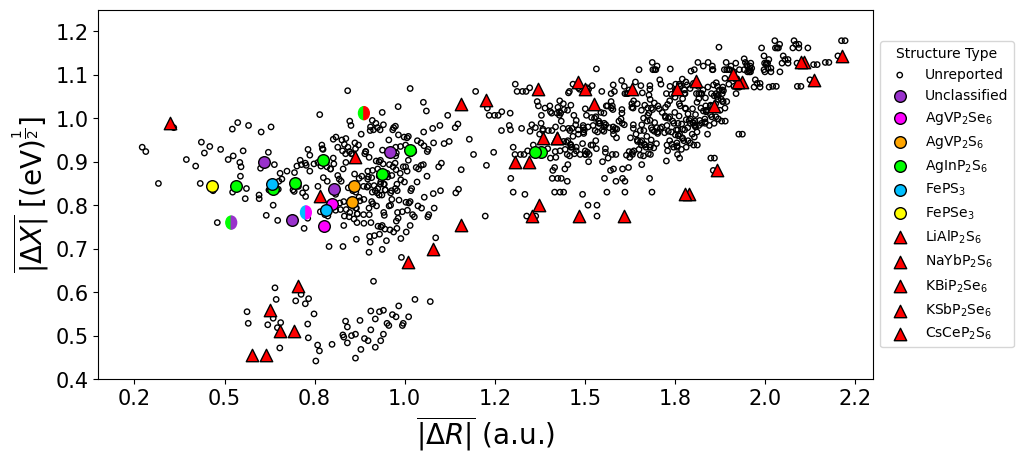

In [9]:
S_types = ("AgVP2Se6","AgVP2S6","AgInP2S6","FePS3","FePSe3","LiAlP2S6","NaYbP2S6","KBiP2Se6","KSbP2Se6","CsCeP2S6")
def to_subscript(s):
    return re.sub(r'(\d)', r'$_{\1}$', s)

S_types_with_subscripts = [to_subscript(name) for name in S_types]

inlist = np.loadtxt('reported_ICSD.txt',dtype = float, usecols=(1,2,3,4,5),delimiter=' ') 
inlist_char = np.loadtxt('reported_ICSD.txt',dtype = str, usecols=(0),delimiter=' ')  #column-0: compound name
inlist_val = np.loadtxt('reported_ICSD.txt',dtype = int, usecols=(5),delimiter=' ')  #column-5: the number corresponds to the structure type, this is define color coating
not_Classified = np.loadtxt('unclassified_ICSD.txt',dtype = float, usecols=(1,2,3,4),delimiter=' ')
not_inlist = np.loadtxt('unreported_ICSD.txt',dtype = float, usecols=(1,2,3,4),delimiter= ' ')

fig = plt.plot()
ax = plt.subplot()
ax.scatter((not_inlist[:,1]),(not_inlist[:,3]), edgecolor = 'black', s = 15, label = "Unreported",marker = 'o',facecolors='none') #ax.scatter:create a scatter plot
ax.scatter((not_Classified[:,1]),(not_Classified[:,3]), c = 'darkorchid',edgecolor = 'black', s = 70, label = "Unclassified", marker = 'o',)

inlist = np.array(inlist)
color_map = { 
    0: ('magenta', 'o',70,1),      #AgVP2Se6
    1: ('orange', 'o',70,1),       #AgVP2S6
    2: ('lime', 'o',70,1),         #AgInP2S6
    3: ('deepskyblue', 'o',70,1), #FePS3
    4: ('yellow', 'o',70,1),}     #FePSe3


inlist_val = inlist[:, 4].astype(int)
excluded_indices = [2,13,14]  #2,13,14 represent the line in inlist: 'CuCrP2Se6','LiScP2S6','CuBiP2Se6'

for i in range(len(inlist)):#plot the structure from ICSD 
    x=inlist[i, 1]
    y=inlist[i, 3]  
    S = str(inlist_char[i])       
    if S == 'CuCrP2Se6':   #It has 2 diff structure type, so color coated with two colors.  
        half_1 = patches.Wedge((x, y), 0.015, 90, 270, color='deepskyblue', edgecolor='black')
        half_2 = patches.Wedge((x, y), 0.015, 270, 90, color='magenta', edgecolor='black')
        ax.add_patch(half_1)
        ax.add_patch(half_2)
        
    if S == 'CuBiP2Se6':   #It has 2 diff structure type, so color coated with two colors.  
        half_1 = patches.Wedge((x, y), 0.015, 90, 270, color='lime', edgecolor='black')
        half_2 = patches.Wedge((x, y), 0.015, 270, 90, color='darkorchid', edgecolor='black')
        ax.add_patch(half_1)
        ax.add_patch(half_2) 
       
    if S == 'LiScP2S6':   #It has 2 diff structure type, so color coated with two colors.  
        half_1 = patches.Wedge((x, y), 0.015, 90, 270, color='lime', edgecolor='black')
        half_2 = patches.Wedge((x, y), 0.015, 270, 90, color='red', edgecolor='black')
        ax.add_patch(half_1)
        ax.add_patch(half_2)
    if i in excluded_indices:
        continue  # Skip these indices
    
    label = inlist_val[i]                                    # Extract label as integer
    color_marker_tuple = color_map.get(label, ('red', '^',80,1.0))  # Default to red triangle
    color, marker, size, alpha = color_marker_tuple  # Unpack the tuple
    label_with_subscript = S_types_with_subscripts[inlist_val[i]]
    ax.scatter(x,y, c=color, s=size, edgecolors='black', marker=marker, label=label_with_subscript, alpha=alpha)
        

def legend_without_duplicate_labels(figure):  # defines a function named "legend_without_duplicate_labels(figure)" how labels are input in to the legend and removes duplicate legend labels
    handles, labels = ax.get_legend_handles_labels()  # retirieves label values and stores as handles
    by_label = dict(zip(labels, handles))  #organizes dictionary with zip by order in which the label is first passed and stores new dictionary as by_label. sets labels as the key and handles as the values
    
    lgd = ax.legend(by_label.values(), by_label.keys(), loc='center left', bbox_to_anchor=(1, 0.5),title = "Structure Type")  #sets lgd as the list in the dic with no duplicate keys. loc and bbox will define the location of the legend box. 


legend_without_duplicate_labels(ax)

plt.xlabel(r"$\overline{|ΔR|}$ (a.u.)", fontsize=20)
plt.ylabel(r"$\overline{|\Delta X|}$ [(eV)$^{\frac{1}{2}}$]", fontsize=20)

#x and y tick labels
ax.set_xticklabels(ax.get_xticks(),fontsize = 15)
ax.set_yticklabels(ax.get_yticks(),fontsize = 15)
ax.xaxis.set_major_formatter(ticker.FormatStrFormatter('%.1f'))
ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%.1f'))

ax.set_xlim(0.15, 2.3)  # Replace xmin and xmax with your desired values
ax.set_ylim(0.4, 1.25)  # Replace ymin and ymax with your desired values

#Save and show figure
ax.figure.set_figwidth(10)     
plt.savefig("Plot-1+3+-R&X ", dpi= 600, format=None, metadata=None,
        bbox_inches='tight', pad_inches=.4,
        facecolor='auto', edgecolor='auto',
        backend=None,)

plt.show()


# The all codes below are only for data extraction

In [10]:
ICSD_entry = ("AgVP2Se6","CuVP2S6","CuCrP2Se6","AgVP2S6","AgCrP2S6","AgInP2S6","AgScP2S6","CuInP2Se6","AgInP2Se6","AgGaP2Se6",
                "AgErP2Se6","AgScP2Se6","AgTmP2Se6","LiScP2S6","CuBiP2Se6","AgCrP2Se6","AgAlP2Se6","CuAlP2Se6","CuInP2S6","CuCrP2S6",
                "CuScP2S6","AgBiP2Se6","LiAlP2S6","NaYbP2S6","AgBiP2S6","NaErP2S6","NaLuP2S6","NaTbP2S6","NaYP2S6","TlInP2Se6",
               "KBiP2Se6","NaSmP2S6","NaCeP2S6","NaSbP2S6","NaPrP2S6","KCeP2S6","KPrP2S6","TlCeP2S6","RbLaP2S6","NaLaP2S6","NaCeP2Se6","KLaP2Se6","TlCeP2Se6","TlLaP2Se6","TlLaP2S6","TlPrP2Se6","TlBiP2Se6","KBiP2S6",
               "KSbP2S6","KSbP2Se6","NaSbP2S6","KBiP2S6","TlBiP2S6","TlInP2S6","TlSbP2S6","KBiP2Se6","TlSbP2Se6","TlDyP2Se6","TlErP2Se6","TlSmP2Se6","TlYP2Se6","TlBiP2S6",
               "CsCeP2S6","CsCeP2Se6","CsLaP2S6")

In [11]:
# Open the file cf_2decimal for reading
with open('cf_2decimal.txt', 'r') as cf_file:
    lines = cf_file.readlines()
         
with open('Candidate_1.txt', 'w') as Candidate_1, \
     open('Candidate_Ma.txt', 'w') as Candidate_Ma, \
     open('Candidate_T_R_Ma.txt', 'w') as Candidate_T_R_Ma, \
     open('Candidate_T_R_Mi.txt', 'w') as Candidate_T_R_Mi, \
     open('Candidate_R_EN_Ma.txt', 'w') as Candidate_R_EN_Ma, \
     open('Candidate_R_EN_Ma_ex.txt', 'w') as Candidate_R_EN_Ma_ex, \
     open('Candidate_R_EN_Mi.txt', 'w') as Candidate_R_EN_Mi, \
     open('Candidate_T_V.txt', 'w') as Candidate_T_V, \
     open('Candidate_T_V417.txt', 'w') as Candidate_T_V417, \
     open('Candidate_T_V317.txt', 'w') as Candidate_T_V317, \
     open('Candidate_T_V300.txt', 'w') as Candidate_T_V300, \
     open('Candidate_T_V283.txt', 'w') as Candidate_T_V283, \
     open('Candidate_T_Vspace_317417.txt', 'w') as Candidate_T_Vspace_317417, \
     open('Candidate_R_V.txt', 'w') as Candidate_R_V, \
     open('Candidate_R_V417.txt', 'w') as Candidate_R_V417, \
     open('Candidate_R_V317.txt', 'w') as Candidate_R_V317, \
     open('Candidate_R_V300.txt', 'w') as Candidate_R_V300, \
     open('Candidate_R_V283.txt', 'w') as Candidate_R_V283, \
     open('Candidate_R_Vspace_317417.txt', 'w') as Candidate_R_Vspace_317417:

    for line in lines:
        # Split the line into components
        parts = line.split()
        m = parts[0]  
        name = parts[1]  
        delta_t = float(parts[2])
        Absdelta_r = float(parts[3])
        Absdelta_Nv = float(parts[4])
        Absdelta_Neg = float(parts[5])
        
        # Check the conditions for Candidate
        if (1.60 <= delta_t <= 2.90 and
            0.40 <= Absdelta_r <= 1.40 and
            Absdelta_Nv in [2.83, 3.00, 3.17, 4.17] and
            0.7 <= Absdelta_Neg <= 1.1 and
            name not in ICSD_entry):  
            Candidate_1.write(line)  # All unreported filtered by T,R,V,EN

        if (1.60 <= delta_t <= 2.90 and
            0.40 <= Absdelta_r <= 1.05 and
            Absdelta_Nv in [3.00, 3.17, 4.17] and
            0.7 <= Absdelta_Neg <= 0.95 and
            name not in ICSD_entry):  
            Candidate_Ma.write(line)  # All unreported filtered by T,R,V,EN-Majority
                    
        if (1.60 <= delta_t <= 2.90 and
            0.40 <= Absdelta_r <= 1.05 and
            name not in ICSD_entry):  
            Candidate_T_R_Ma.write(line)     #T_R_Majority
            
        if (2.10 <= delta_t <= 2.20 and  
            1.34 <= Absdelta_r <= 1.40 and
            name not in ICSD_entry):  
            Candidate_T_R_Mi.write(line)     # T_R_Minority  
        
        if (0.40 <= Absdelta_r <= 1.05 and
            0.7 <= Absdelta_Neg <= 1.1 and
            name not in ICSD_entry):  
            Candidate_R_EN_Ma.write(line)     #R_EN_Majority
            
        if (0.40 <= Absdelta_r <= 1.05 and
            0.7 <= Absdelta_Neg <= 0.95 and
            name not in ICSD_entry):  
            Candidate_R_EN_Ma_ex.write(line)     #R_EN_Majority_exclude LiScP2S6
        
        if (1.34 <= Absdelta_r <= 1.40 and
            0.90 <= Absdelta_Neg <= 0.94 and
            name not in ICSD_entry):  
            Candidate_R_EN_Mi.write(line)     #R_EN_Minority
                
        if (1.60 <= delta_t <= 2.90 and
            Absdelta_Nv in [2.83, 3.00, 3.17, 4.17] and
            name not in ICSD_entry): 
            Candidate_T_V.write(line)         #T_V
            
        if (1.60 <= delta_t <= 2.90 and \
            Absdelta_Nv == 4.17 and \
            name not in ICSD_entry): 
            Candidate_T_V417.write(line)         #T_V = 4.17
            
        if (1.60 <= delta_t <= 2.90 and \
            Absdelta_Nv == 3.17 and \
            name not in ICSD_entry): 
            Candidate_T_V317.write(line)         #T_V = 3.17
            
        if (1.60 <= delta_t <= 2.90 and \
            Absdelta_Nv == 3.00 and \
            name not in ICSD_entry): 
            Candidate_T_V300.write(line)         #T_V = 3.00

        if (2.63 <= delta_t <= 2.69 and \
            Absdelta_Nv == 2.83 and \
            name not in ICSD_entry): 
            Candidate_T_V283.write(line)         #T_V = 2.83

        if (1.60 <= delta_t <= 2.90 and \
            3.17 < Absdelta_Nv < 4.17 and \
            name not in ICSD_entry): 
            Candidate_T_Vspace_317417.write(line)         #T_V = space between 3.17 - 4.17
                            
        if (0.40 <= Absdelta_r <= 1.40 and
            Absdelta_Nv in [2.83, 3.00, 3.17, 4.17] and
            name not in ICSD_entry):  
            Candidate_R_V.write(line)         #R_V
        
        if (0.40 <= Absdelta_r <= 1.40 and \
            Absdelta_Nv == 4.17 and \
            name not in ICSD_entry):  
            Candidate_R_V417.write(line)         #R_V = 4.17
        
        if (0.40 <= Absdelta_r <= 1.40 and \
            Absdelta_Nv == 3.17 and \
            name not in ICSD_entry):  
            Candidate_R_V317.write(line)         #R_V = 3.17
        
        if (0.40 <= Absdelta_r <= 1.40 and \
            Absdelta_Nv == 3.00 and \
            name not in ICSD_entry):  
            Candidate_R_V300.write(line)         #R_V = 3.00
        
        if (0.40 <= Absdelta_r <= 1.40 and \
            Absdelta_Nv == 2.83 and \
            name not in ICSD_entry):  
            Candidate_R_V283.write(line)         #R_V = 2.83
            
        if (0.40 <= Absdelta_r <= 1.40 and \
            3.17 < Absdelta_Nv < 4.17 and \
            name not in ICSD_entry):  
            Candidate_R_Vspace_317417.write(line)         #R_V = space between 3.17 - 4.17        
                

# Calculate the frequency and collect the filenames and data into count.txt

In [12]:
# Define the filenames
filenames = [
    'Candidate_T_R_Ma.txt',
    'Candidate_T_R_Mi.txt',
    'Candidate_R_EN_Ma.txt',
    # 'Candidate_R_EN_Ma_ex.txt',
    'Candidate_R_EN_Mi.txt',
    'Candidate_T_V.txt',
    # 'Candidate_T_V417.txt',
    # 'Candidate_T_V317.txt',
    # 'Candidate_T_V300.txt',
    # 'Candidate_T_V283.txt',
    # 'Candidate_T_Vspace_317417.txt',
    'Candidate_R_V.txt',
    # 'Candidate_R_V417.txt',
    # 'Candidate_R_V317.txt',
    # 'Candidate_R_V300.txt',
    # 'Candidate_R_V283.txt',
    # 'Candidate_R_Vspace_317417.txt',
]

# Dictionary to store compound counts, their source files, and the full lines
compound_count = defaultdict(lambda: {'count': 0, 'files': set(), 'lines': set()})

# Function to convert numbers in compound names to subscript format
def to_subscript(text):
    # Define the mapping of digits to subscript characters
    subscript_map = str.maketrans('0123456789', '₀₁₂₃₄₅₆₇₈₉')
    return text.translate(subscript_map)

# Read each file and update the counts
for filename in filenames:
    if os.path.exists(filename):  # Check if the file exists
        with open(filename, 'r') as file:
            for line in file:
                columns = line.strip().split()  # Split line into columns
                if columns:  # Check if there's at least one column
                    compound_name = columns[1]  # Get the compound name
                    formatted_name = to_subscript(compound_name)  # Convert the name to subscript format
                    compound_count[formatted_name]['count'] += 1  # Increment count
                    compound_count[formatted_name]['files'].add(filename)  # Add filename
                    compound_count[formatted_name]['lines'].add(line.strip())  # Store the full line

# Sort compounds by count in descending order
sorted_compounds = sorted(compound_count.items(), key=lambda item: item[1]['count'], reverse=True)

# Write to 'count.txt'
with open('count.txt', 'w') as count_file:
    count_file.write('Compound Name\tCount\tFiles\tLines\n')  # Write header
    for compound, data in sorted_compounds:
        files_list = ', '.join(data['files'])  # Join filenames
        lines_content = ' | '.join(sorted(data['lines']))  # Join unique lines and sort them for consistency
        count_file.write(f"{compound}\t{data['count']}\t{files_list}\t{lines_content}\n")  # Write compound info